In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 2000)

In [37]:
loan_data=pd.read_csv("C:\\Users\\Kumar.Polavarapu\\Downloads\\loan.csv",header=0,low_memory=False)

In [6]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [8]:
loan_data.dtypesgrade

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [18]:
loan_data['Isdefault']=loan_data['delinq_2yrs'].apply(lambda x: 1 if x>=1 else 0)

In [19]:
loan_data['Isdefault'].sum()

4312

In [12]:
loan_data['Isdefault'].describe()

count    39717.000000
mean         0.108568
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Isdefault, dtype: float64

In [32]:
loan_data.sort_values('int_rate',ascending=False).groupby(["int_rate"])["Isdefault"].agg({'sum','count'})

,sum,count
int_rate,,
10.00%,19,251
10.01%,1,7
10.08%,1,48
10.14%,1,10
10.20%,2,18
10.25%,15,218
10.28%,5,21
10.33%,0,9
10.36%,32,250


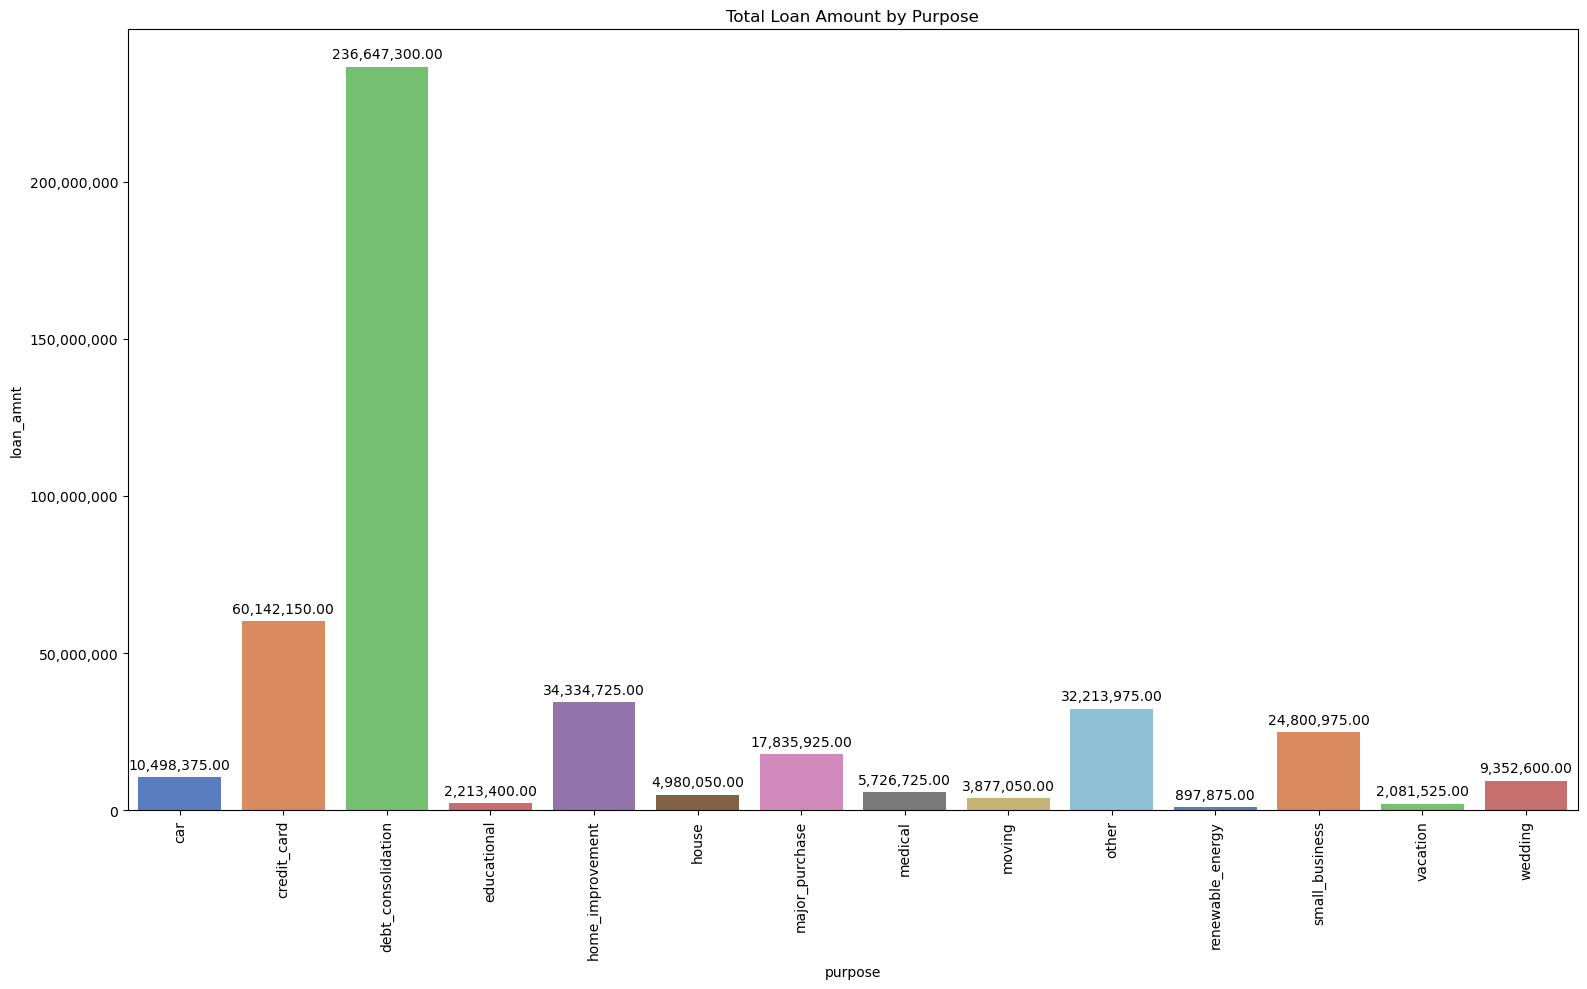

income Distribution by applicant Age Range:


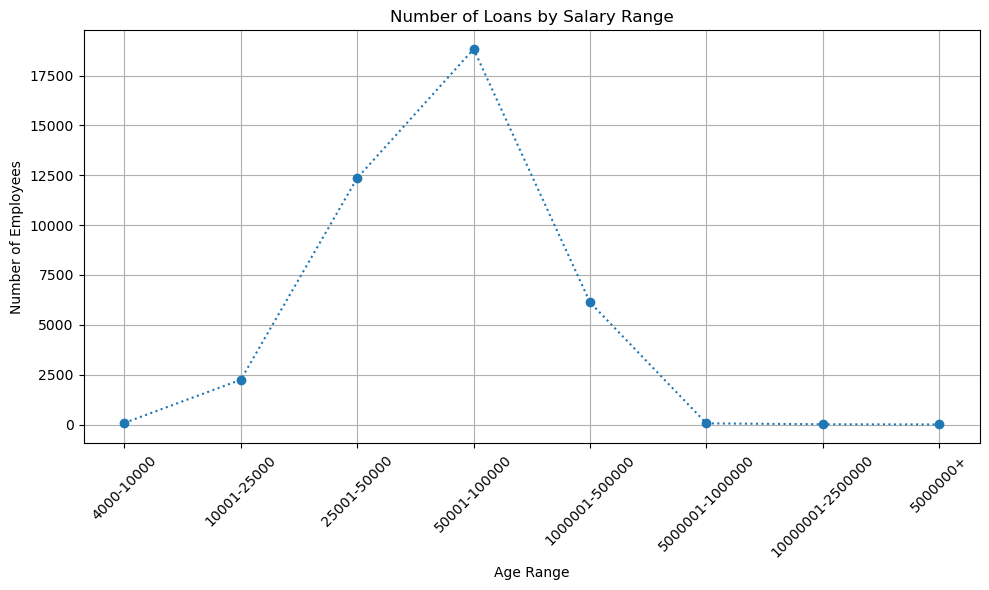

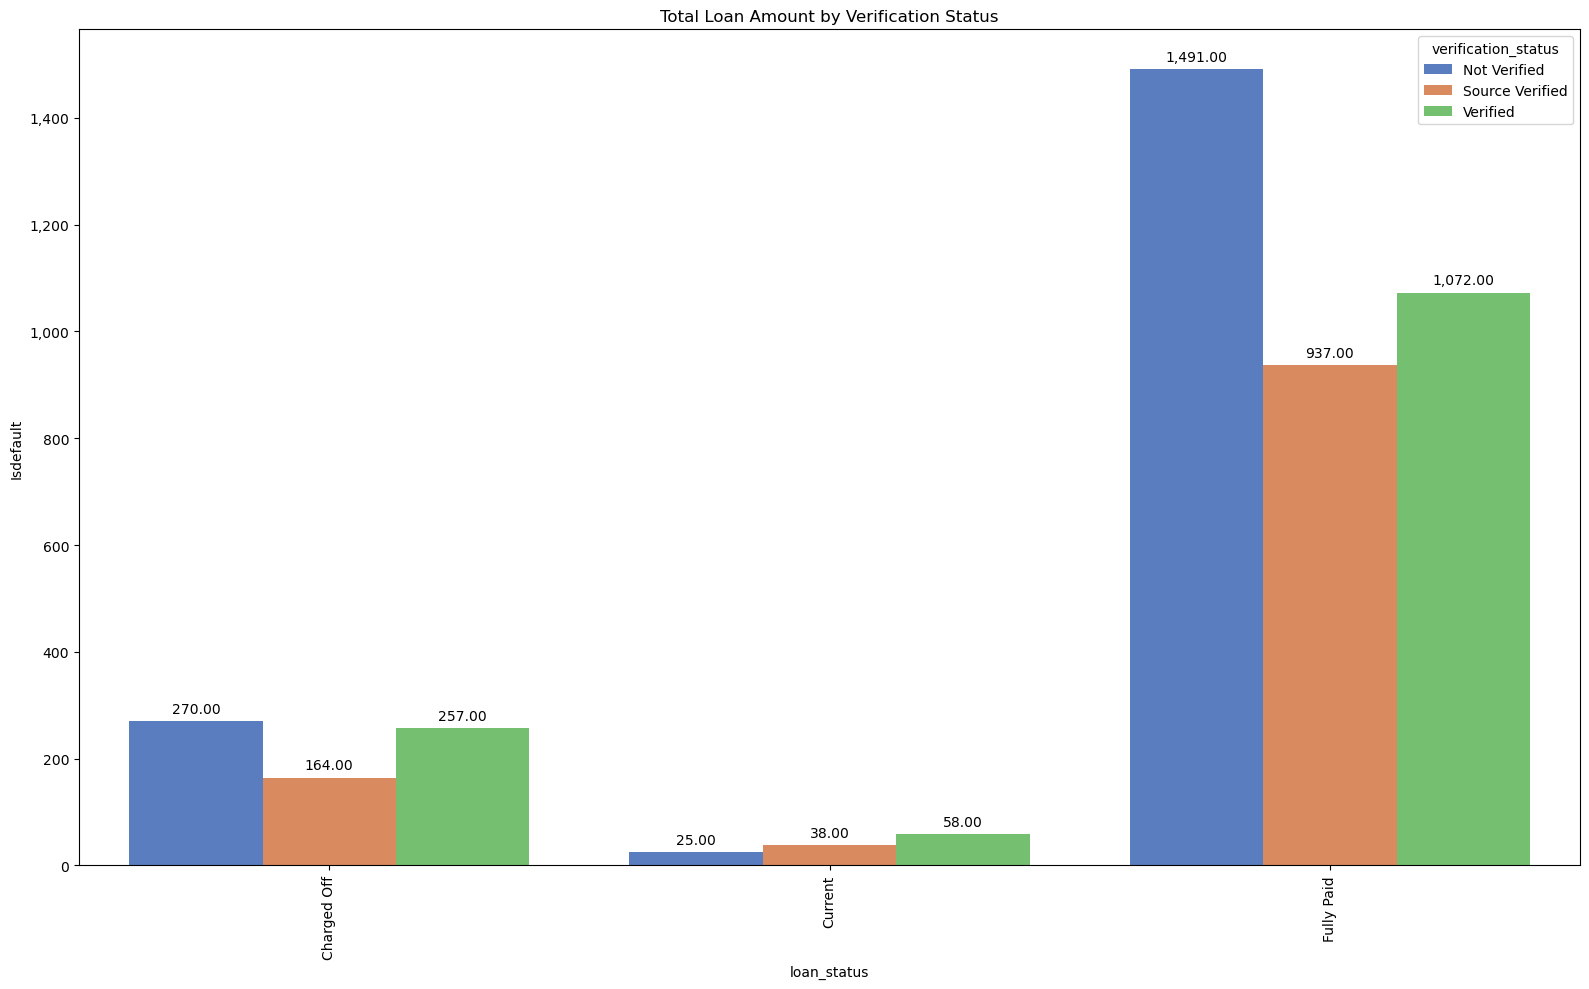

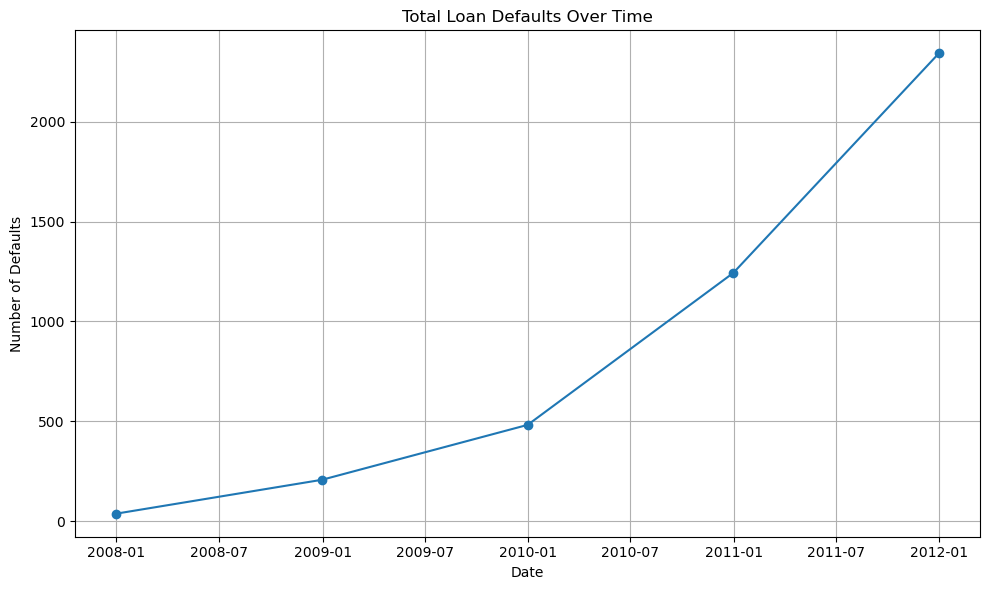

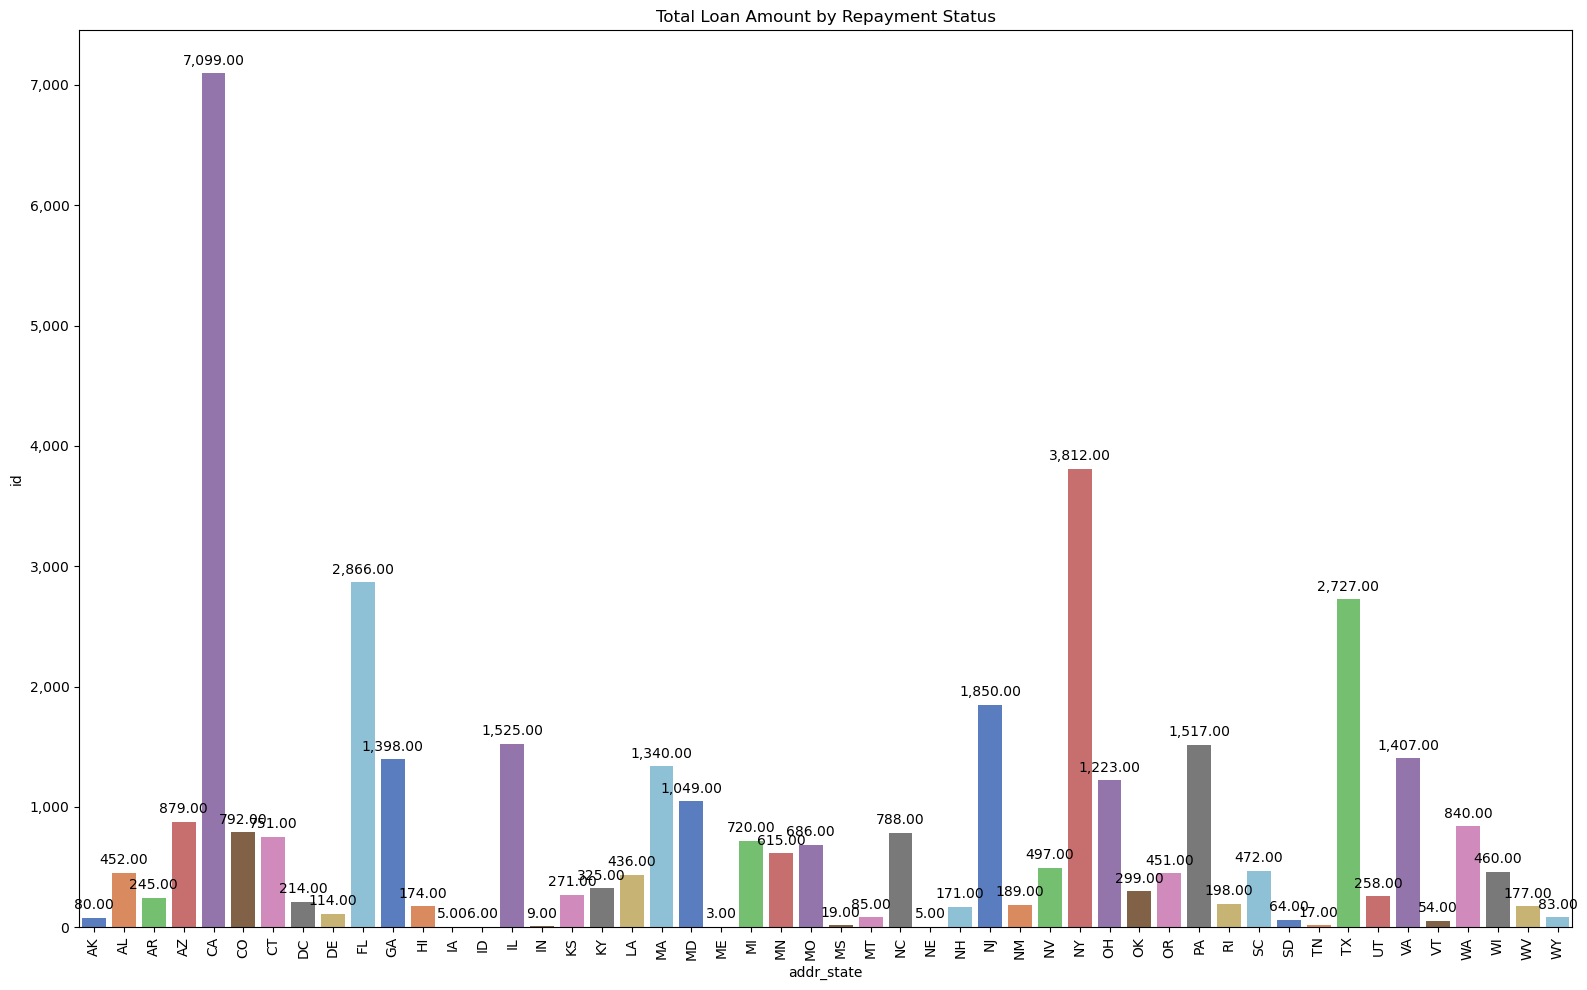

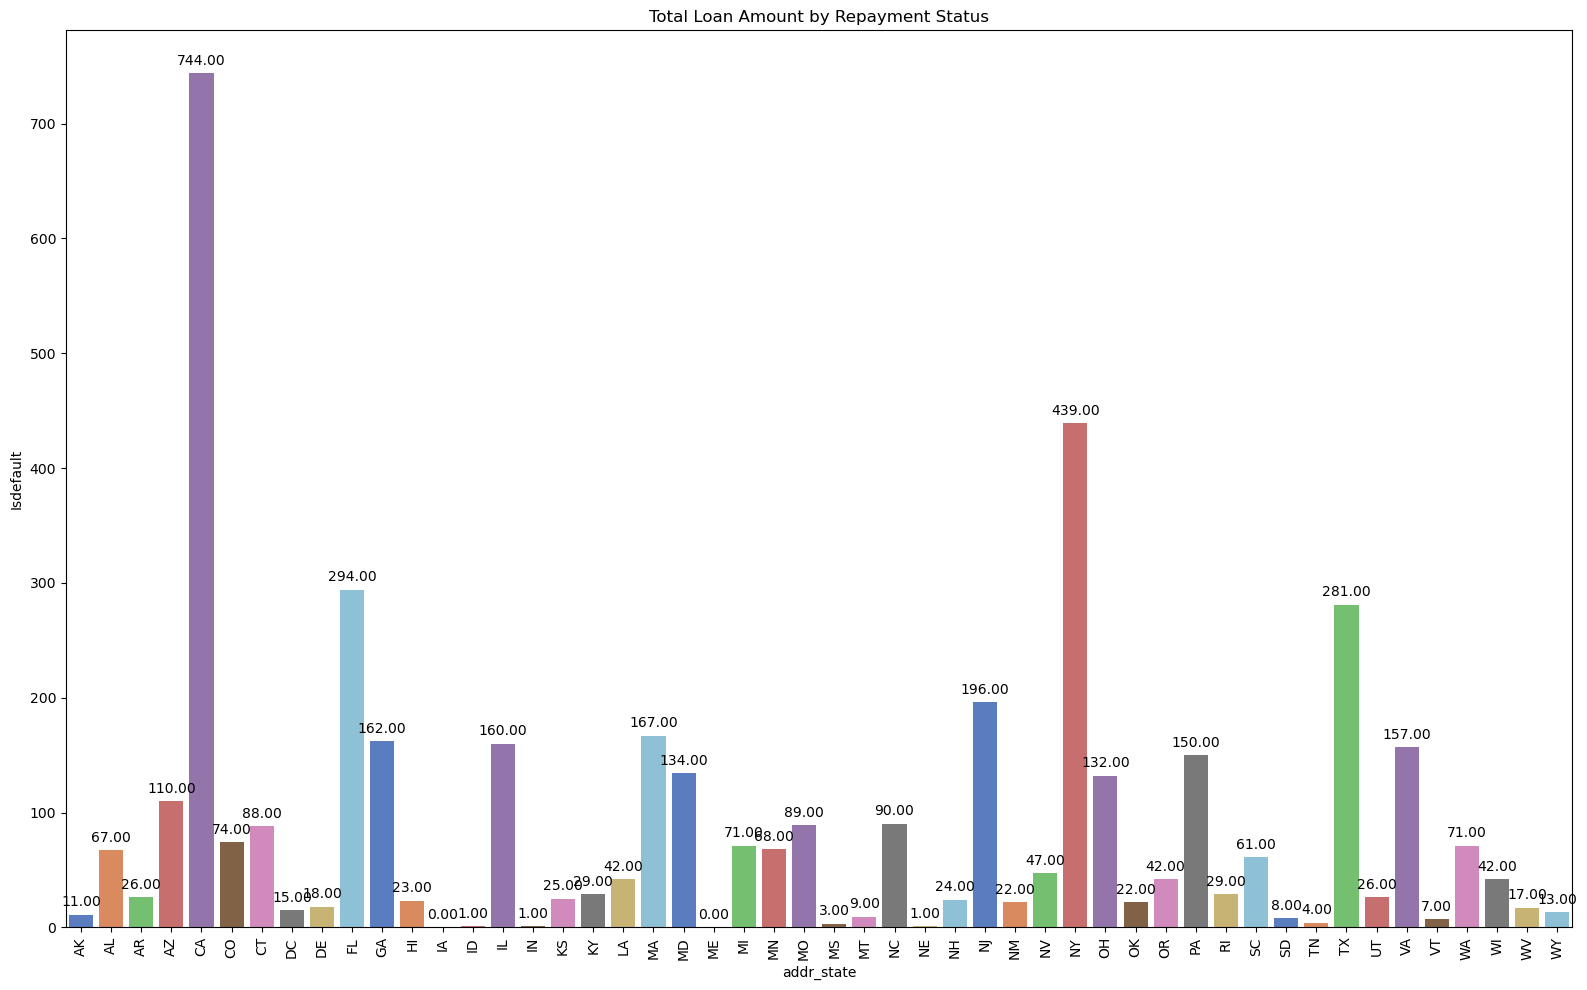

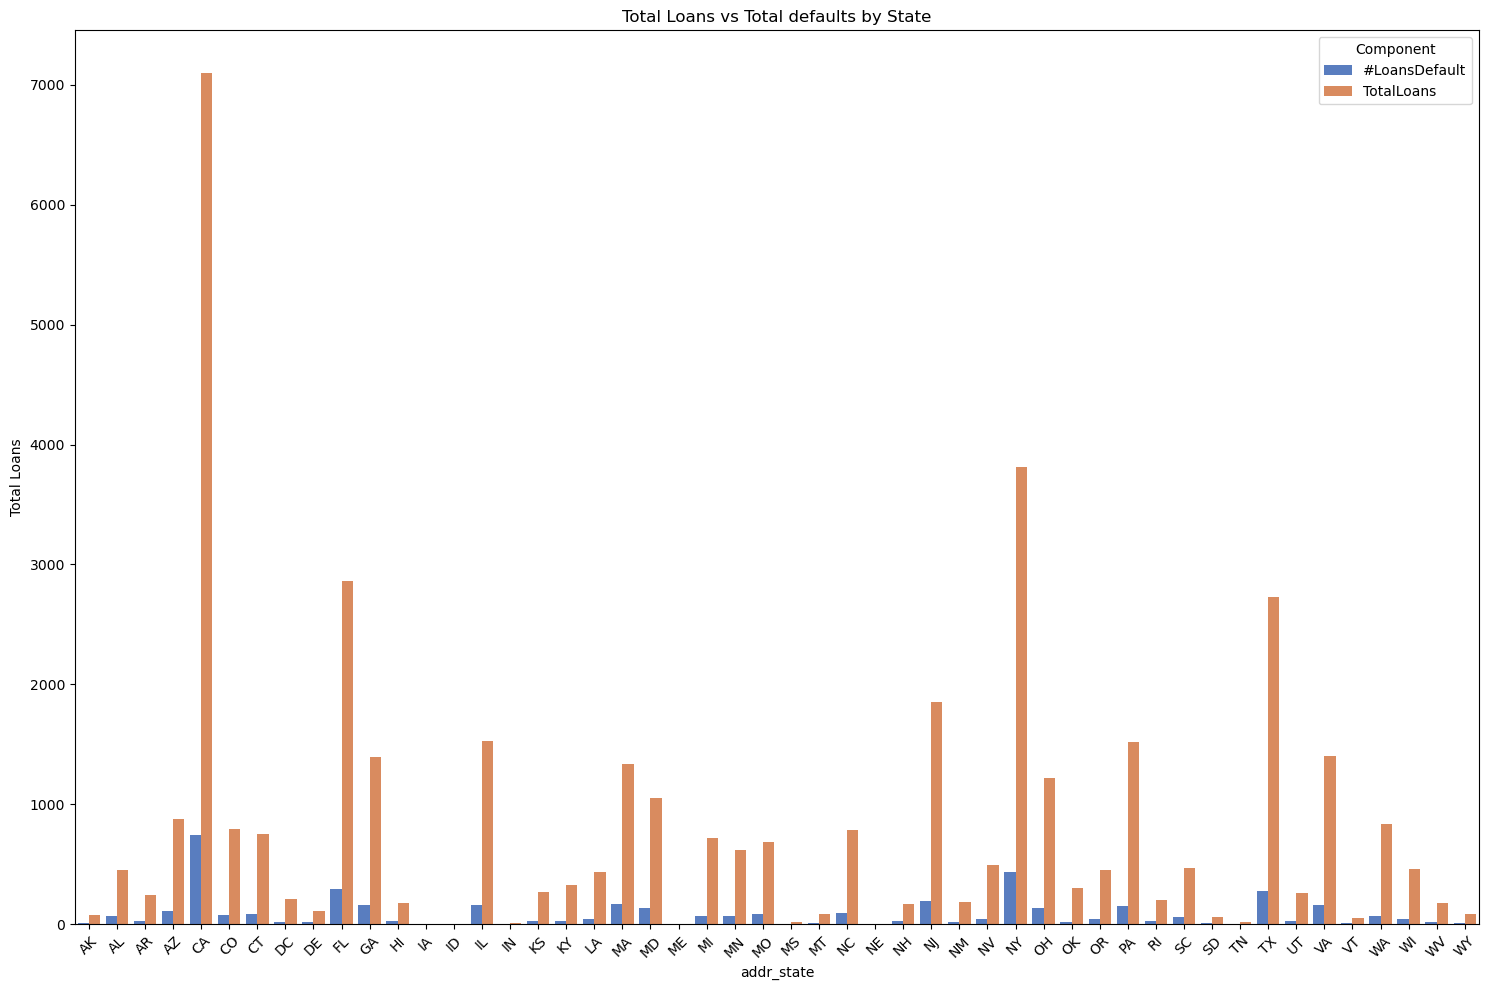

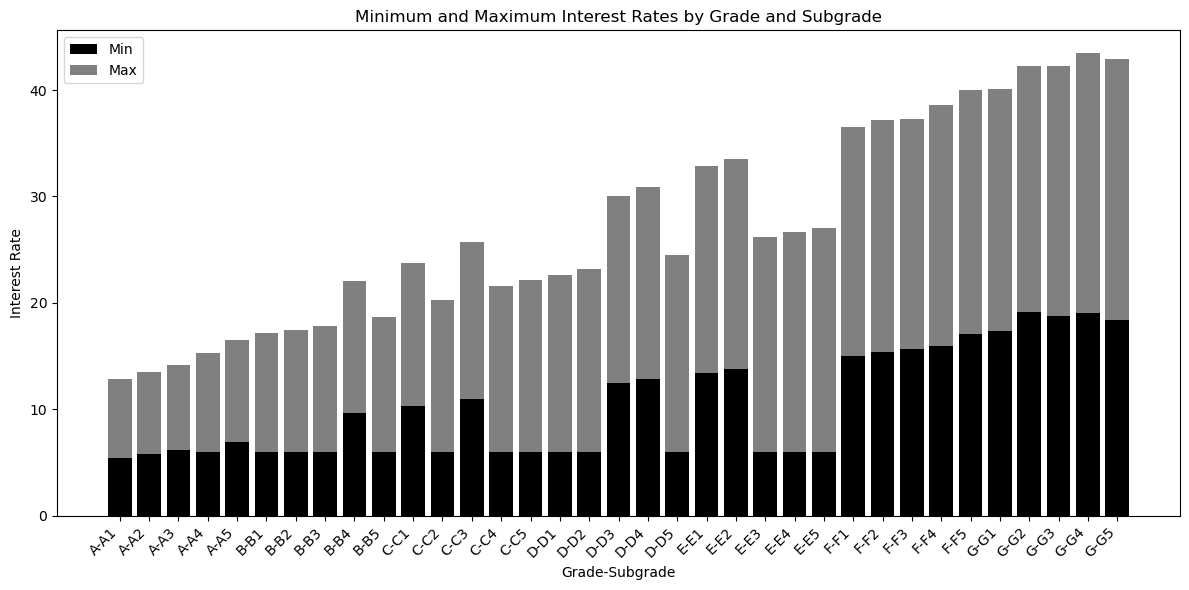

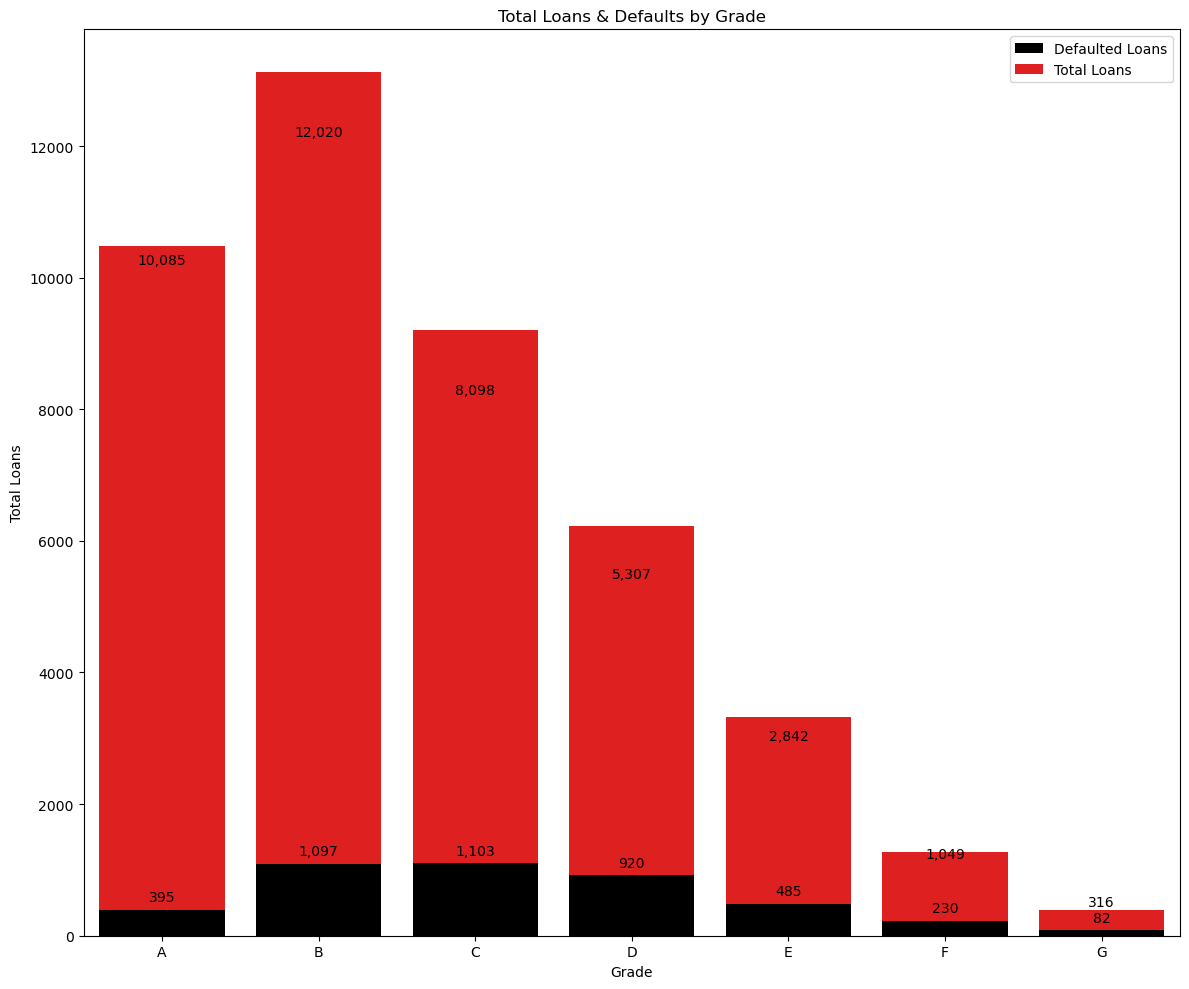

Loan Distribution by Amount:


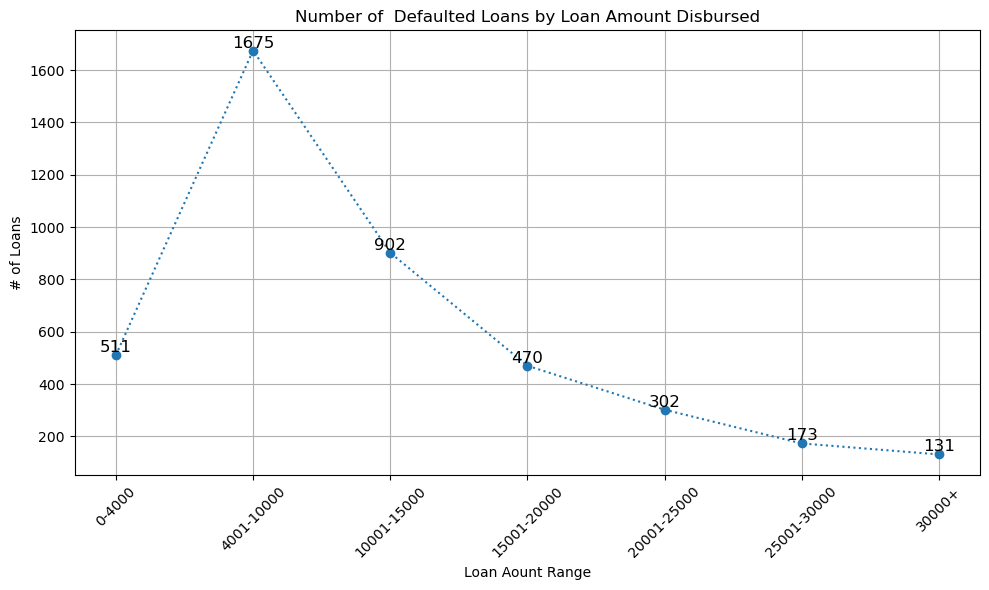

Loan Distribution by Amount:


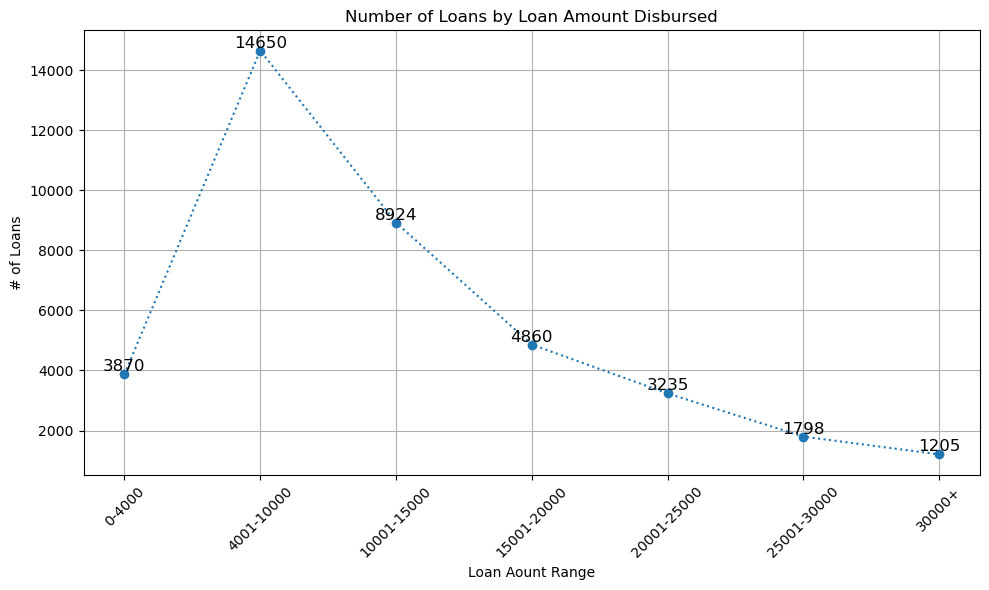

<Figure size 1000x600 with 0 Axes>

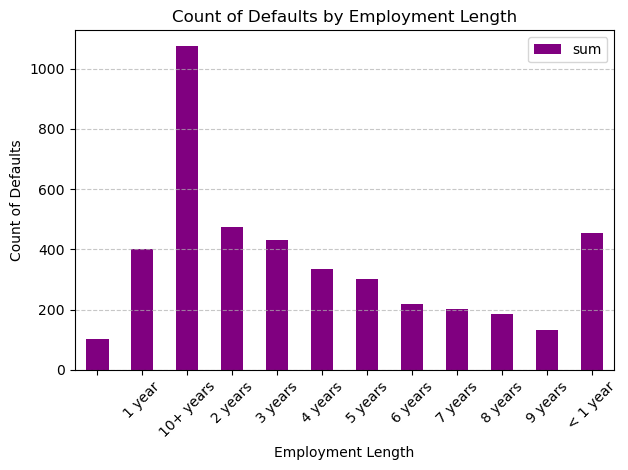

In [58]:
# Importing Libraries
import pandas as pd
pd.options.display.max_rows=1500
pd.options.display.max_columns=5000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Pre Cleansing required
##Open Excel and format dates and safe if not the dates are getting loaded as DD-MON format


##import the CSH file as dataframe using Pandas
loan_data=pd.read_csv("C:\\Users\\Kumar.Polavarapu\\Downloads\\loan.csv",header=0,low_memory=False)

##Check the data types of the data imported
loan_data.dtypes

#Data Cleansing

loan_data['Isdefault'] = (loan_data['delinq_2yrs'] > 0).astype(int)

##Replacing % string in the int rate field
loan_data['int_rate']=loan_data['int_rate'].str.replace('%','')

##Changing data type of loan rate column to integer
loan_data.int_rate=loan_data.int_rate.astype("float")

##Changing data type of issue_d column to date
loan_data['issue_d']=pd.to_datetime(loan_data['issue_d'])


##Changing data type of earliest_cr_line column to date
loan_data['earliest_cr_line']=pd.to_datetime(loan_data['earliest_cr_line'])

##Changing data type of last_pymnt_d column to date
loan_data['last_pymnt_d']=pd.to_datetime(loan_data['last_pymnt_d'])

##Changing data type of last_credit_pull_d column to date
loan_data['last_credit_pull_d']=pd.to_datetime(loan_data['last_credit_pull_d'])

##Changing data type of next_pymnt_d column to date
loan_data['next_pymnt_d']=pd.to_datetime(loan_data['next_pymnt_d'])

##Creating the below excel to review the outliers and see if any excemptions are needed
loan_data.describe().to_excel("test123.xlsx",index=True)


##Replacing 'Months' string in the term field
loan_data['term']=loan_data['term'].str.replace('months','')

##Changing data type of Term  column to integer
loan_data.term=loan_data.term.astype("int32")

##Removing all the default values across columns i.e. replacing nan values
loan_data=loan_data.fillna("")

##Analyzing data to see how the loans are sactioned based on Purpose & Grade
from matplotlib.ticker import FuncFormatter
loan_agg = loan_data.groupby(['purpose'])['loan_amnt'].sum().reset_index()
plt.figure(figsize=(16, 10))
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Total Loan Amount by Purpose')
ax=sns.barplot(x='purpose',y='loan_amnt',data=loan_agg, palette='muted')
# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format x-axis tick labels to display in millions
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

##ABove analysis shows debt consolidation is the standing out amoung the loans disbursed. 53% of the loans are for purpose debt consolidation
loan_summary = loan_data.groupby(['purpose'])['loan_amnt'].agg(['sum', 'count']).reset_index()
loan_summary.rename(columns={'sum': 'Totalloanamount', 'count': 'TotalLoans'}, inplace=True)
total_loan = loan_summary['Totalloanamount'].sum()
total_count = loan_summary['TotalLoans'].sum()
loan_summary['% of Totalloanamount'] = (loan_summary['Totalloanamount'] / total_loan) * 100
loan_summary['% of Totalloans'] = (loan_summary['TotalLoans'] / total_count) * 100
loan_summary.to_excel("loan_summary.xlsx",index=True)

#defining total loans by salary ranges
# Define salary ranges
salary_bins = [4000, 10000, 25000, 50000, 100000, 500000, 1000000,2500000,115000000]  # Define salary ranges as bins
salary_labels = ['4000-10000', '10001-25000', '25001-50000', '50001-100000', '1000001-500000', '5000001-1000000', '10000001-2500000', '5000000+']  # Labels for the salary ranges

# Add Age Range column to DataFrame
loan_data['SalaryRange'] = pd.cut(loan_data['annual_inc'], bins=salary_bins, labels=salary_labels, right=False)

# Aggregate the data to calculate the average salary for each age range
loan_data_incsummary = loan_data.groupby('SalaryRange')['annual_inc'].count().reset_index()
loan_data_incsummary.rename(columns={'annual_inc': 'TotalLoans'}, inplace=True)

print("income Distribution by applicant Age Range:")
loan_data_incsummary.to_excel("loan_data_incsummary.xlsx",index=True)

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(loan_data_incsummary.SalaryRange, loan_data_incsummary.TotalLoans, marker='o', linestyle='dotted')
plt.xlabel('Age Range')
plt.ylabel('Number of Employees')
plt.title('Number of Loans by Salary Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()


##Analyzing data to see how the loans are sactioned based on varification status
from matplotlib.ticker import FuncFormatter
loan_agg = loan_data.groupby(['loan_status','verification_status'])['Isdefault'].sum().reset_index()
plt.figure(figsize=(16, 10))
plt.xlabel('loan_status')
plt.ylabel('Isdefault')
plt.title('Total Loan Amount by Verification Status')
ax=sns.barplot(x='loan_status',y='Isdefault',hue='verification_status',data=loan_agg, palette='muted')
# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Format x-axis tick labels to display in millions
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

##Analyzing data to see how the loans are defaulted based on issue date
defaults_over_time = loan_data.resample('Y', on='issue_d')['Isdefault'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(defaults_over_time.index, defaults_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Defaults')
plt.title('Total Loan Defaults Over Time')
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()



##below code is to show the defaulters/loans by state
from matplotlib.ticker import FuncFormatter
loan_agg = loan_data.groupby(['addr_state'])['id'].count().reset_index()
plt.figure(figsize=(16, 10))
plt.xlabel('addr_state')
plt.ylabel('id')
plt.title('Total Loan Amount by Repayment Status')
ax=sns.barplot(x='addr_state',y='id'#,hue='verification_status'
               ,data=loan_agg, palette='muted')
# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')


# Format x-axis tick labels to display in millions
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

##Analyzing data to see how the loans are sactioned based on Purpose & Grade
from matplotlib.ticker import FuncFormatter
loan_agg = loan_data.groupby(['addr_state'])['Isdefault'].sum().reset_index()
plt.figure(figsize=(16, 10))
plt.xlabel('addr_state')
plt.ylabel('Isdefault')
plt.title('Total Loan Amount by Repayment Status')
ax=sns.barplot(x='addr_state',y='Isdefault'#,hue='verification_status'
               ,data=loan_agg, palette='muted')
# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')


# Format x-axis tick labels to display in millions
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

##Below script is to show loans/defaults by state

totals_by_state = loan_data.groupby('addr_state').agg({'Isdefault': 'sum', 'member_id': 'count'}).reset_index()
totals_by_state.rename(columns={'Isdefault': '#LoansDefault', 'member_id': 'TotalLoans'}, inplace=True)
# Melt the DataFrame to long format
totals_by_state_melted = pd.melt(totals_by_state, id_vars='addr_state', var_name='Component', value_name='Total Amount')

# Plotting
plt.figure(figsize=(15, 10))  # Increase the figure size
sns.barplot(x='addr_state', y='Total Amount', hue='Component', data=totals_by_state_melted, palette='muted')
plt.xlabel('addr_state')
plt.ylabel('Total Loans')
plt.title('Total Loans vs Total defaults by State')
plt.legend(title='Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Analyzing interest rates by grade
plt.figure(figsize=(12, 6))

totals_by_grade = loan_data.groupby(['grade','sub_grade'])['int_rate'].agg([('Min', 'min'), ('Max', 'max')]).reset_index()

# Plot minimum interest rates
plt.bar(totals_by_grade['grade'] + '-' + totals_by_grade['sub_grade'], totals_by_grade['Min'], color='black', label='Min')

# Plot maximum interest rates
plt.bar(totals_by_grade['grade'] + '-' + totals_by_grade['sub_grade'], totals_by_grade['Max'], color='grey', label='Max', bottom=totals_by_grade['Min'])

plt.xlabel('Grade-Subgrade')
plt.ylabel('Interest Rate')
plt.title('Minimum and Maximum Interest Rates by Grade and Subgrade')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#increase in % of defaulted loans for lower grades
# Group by state and calculate total salary and total bonus for each state
totals_by_length = loan_data.groupby(['grade'])['Isdefault'].agg([('Defaulted Loans', 'sum'), ('Total Loans', 'count')]).reset_index()
totals_by_length
#totals_by_state.plot(kind='bar', stacked=True)
totals_by_length['% of Total'] = (totals_by_length['Defaulted Loans'] / totals_by_length['Total Loans']) * 100
plt.figure(figsize=(12, 10))
ax=sns.barplot(x='grade', y='Defaulted Loans', data=totals_by_length, color='black', label='Defaulted Loans')
sns.barplot(x='grade', y='Total Loans', data=totals_by_length, color='red', label='Total Loans', bottom=totals_by_length['Defaulted Loans'])
plt.xlabel('Grade')
plt.ylabel('Total Loans')
plt.title('Total Loans & Defaults by Grade')
plt.legend()
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center',
    xytext=(0, 9),
    textcoords='offset points')
plt.tight_layout()
plt.show()




##Loan analysis by amount of loan
Loan_bins = [2000, 4000, 10000, 15000, 20000, 25000,30000,100000 ]  # Define salary ranges as bins
Loan_labels = ['0-4000', '4001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30000+']  # Labels for the salary ranges

# Add Age Range column to DataFrame
loan_data['Loanrange'] = pd.cut(loan_data['loan_amnt'], bins=Loan_bins, labels=Loan_labels, right=False)

# Aggregate the data to calculate the average salary for each age range
loan_data_loansummary = loan_data.groupby('Loanrange')['Isdefault'].sum().reset_index()
loan_data_loansummary.rename(columns={'Isdefault': 'loan_amnt'}, inplace=True)

print("Loan Distribution by Amount:")
loan_data_loansummary.to_excel("loan_data_Rangesummary.xlsx",index=True)




# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(loan_data_loansummary.Loanrange, loan_data_loansummary.loan_amnt, marker='o', linestyle='dotted')

# Add annotations with values on the plot
for i, (x, y) in enumerate(zip(loan_data_loansummary['Loanrange'], loan_data_loansummary['loan_amnt'])):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12)
   
plt.xlabel('Loan Aount Range')
plt.ylabel('# of Loans')
plt.title('Number of  Defaulted Loans by Loan Amount Disbursed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()


#defining total loans by salary ranges
# Define salary ranges
Loan_bins = [2000, 4000, 10000, 15000, 20000, 25000,30000,100000 ]  # Define salary ranges as bins
Loan_labels = ['0-4000', '4001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30000+']  # Labels for the salary ranges

# Add Age Range column to DataFrame
loan_data['Loanrange'] = pd.cut(loan_data['loan_amnt'], bins=Loan_bins, labels=Loan_labels, right=False)

# Aggregate the data to calculate the average salary for each age range
loan_data_loansummary = loan_data.groupby('Loanrange')['Isdefault'].count().reset_index()
loan_data_loansummary.rename(columns={'Isdefault': 'loan_amnt'}, inplace=True)

print("Loan Distribution by Amount:")
loan_data_loansummary.to_excel("loan_data_Rangesummary.xlsx",index=True)

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(loan_data_loansummary.Loanrange, loan_data_loansummary.loan_amnt, marker='o', linestyle='dotted')

# Add annotations with values on the plot
for i, (x, y) in enumerate(zip(loan_data_loansummary['Loanrange'], loan_data_loansummary['loan_amnt'])):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12)
   
plt.xlabel('Loan Aount Range')
plt.ylabel('# of Loans')
plt.title('Number of Loans by Loan Amount Disbursed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()

##Analyze trend on defaults based on the employment length
grouped_data=loan_data.groupby("emp_length")["Isdefault"].agg(['sum'])
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='purple')
plt.title('Count of Defaults by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count of Defaults')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [49]:
loan_data['emp_length'].groupby(["Isdefault"]).agg({'sum','count'})

KeyError: 'Isdefault'

In [50]:
loan_data['Isdefault'].unique()

array([0, 1])

<Figure size 1000x600 with 0 Axes>

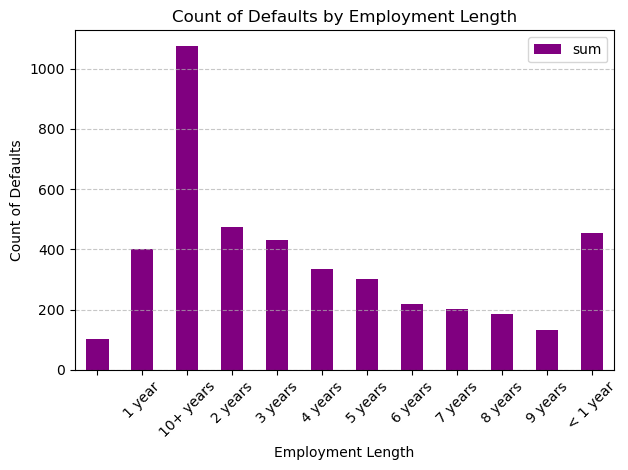

In [56]:
grouped_data=loan_data.groupby("emp_length")["Isdefault"].agg(['sum'])
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='purple')
plt.title('Count of Defaults by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count of Defaults')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()